In [1]:
import numpy as np
import random
import pylab

#### Algorithm 5.1: Conjugate Gradient Preliminary Version

In [42]:
## enter the dimensions
n=20
b=np.ones(n)
x=np.zeros(n)

A=np.zeros([n, n])
for i in range(1, n+1):
    for j in range(1, n+1): A[i-1, j-1]=1/(i+j-1)

def CGP(x, b, A):
    k=0
    r=A.dot(x)-b
    p=-r
    
    while np.linalg.norm(r)>10**(-6):
        l=(r.T).dot(p)
        m=A.dot(p)
        o=(p.T).dot(m)
        alpha=-l/o
        
        x+=alpha*p
        r=A.dot(x)-b
        
        L=(r.T).dot(m)
        M=(p.T).dot(m)
        beta=L/M
        
        p=-r+beta*p
        k+=1
        
        #print('iteration=', k)
        #print('residual=', r)
    
    return (k, r)
        

CGP(x, b, A)


(37506,
 array([-2.73110345e-07, -3.37604433e-08,  3.98606062e-07, -3.38768587e-07,
        -1.15251169e-07,  3.00351530e-07,  1.14785507e-07,  3.78349796e-08,
         1.30268745e-07,  1.76136382e-07,  1.53318979e-07,  1.46683306e-07,
         1.77184120e-07,  1.83819793e-07,  1.06752850e-07, -4.01632860e-08,
        -1.67638063e-07, -1.79163180e-07, -8.71950760e-08, -1.37835741e-07]))

#### Algorithm 5.2: Conjugate Gradient

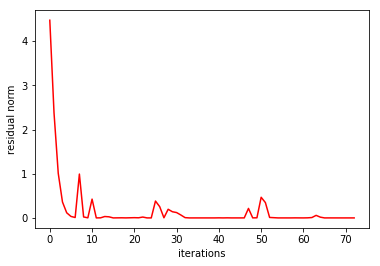

In [81]:
n=20
b=np.ones(n)
x=np.zeros(n)

A=np.zeros([n, n])
for i in range(1, n+1):
    for j in range(1, n+1): A[i-1, j-1]=1/(i+j-1)

def CG(x, b, A):
    k=0
    X=[k]
    r=A.dot(x)-b
    Y=[np.linalg.norm(r)]
    p=-r
    
    while np.linalg.norm(r)>10**(-6):
        l=(r.T).dot(r)
        m=A.dot(p)
        o=(p.T).dot(m)
        alpha=l/o
        
        x+=alpha*p
        r+=alpha*m
        
        L=(r.T).dot(r)
        beta=L/l
        
        p=-r+beta*p
        k+=1
        
        X+=[k, ]
        Y+=[np.linalg.norm(r), ]
        
        #print('iteration=', k)
        #print('residual=', r)
    
    #return (k, r)
    pylab.xlabel('iterations')
    pylab.ylabel('residual norm')
    pylab.plot(X, Y, 'r-')
    pylab.show()

CG(x, b, A)

#### Algorithm 5.3: Preconditioned Conjugate Gradient

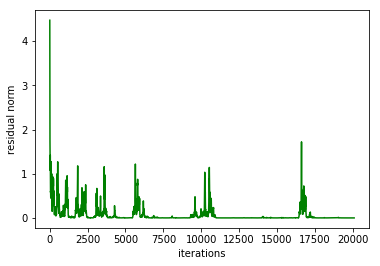

In [2]:
n=20
b=np.ones(n)
x=np.zeros(n)

A=np.zeros([n, n])
for i in range(1, n+1):
    for j in range(1, n+1): A[i-1, j-1]=1/(i+j-1)


def PCG(x, b, A):
    M=np.diag(1/np.diag(A))
    
    r=A.dot(x)-b
    y=np.linalg.inv(M).dot(r)
    p=-r
    k=0
    X=[k]
    Y=[np.linalg.norm(r)]
    
    while np.linalg.norm(r)>10**(-6):
        l=(r.T).dot(y)
        #print("l1=", l)
        m=A.dot(p)
        o=(p.T).dot(m)
        alpha=l/o
        #print(alpha)
        
        x+=alpha*p
        r+=alpha*m
        y=np.linalg.inv(M).dot(r)
        
        L=(r.T).dot(y)
        #print("l2=", l)
        beta=L/l
        p=-y+beta*p
        k+=1
        
        X+=[k, ]
        Y+=[np.linalg.norm(r), ]
        #print('iteration=', k)
        #print('residual=', r)
    
    pylab.plot(X, Y, 'g-')
    pylab.xlabel('iterations')
    pylab.ylabel('residual norm')
    pylab.show()
    #return (k, r)

PCG(x, b, A)
        
    



#### Algorithm 5.4: Fletcher-Reeves Conjugate Gradient

In [47]:
def FR_CG(x):
    F=f(x)
    G=g(x)
    p=-G
    k=0
    
    while np.linalg.norm(G)>10**-6:
        alpha=LSA(1, x) # Line search
        l=(G.T).dot(G)
        x+=alpha*p
        G=g(x)
        F=f(x)
        L=(G.T).dot(G)
        beta=0 if (k+1)%(np.size(x))==0 else L/l
        p=-G+beta*p
        k+=1
        print(k, x)


In [28]:
def PR_CG(x):
    F=f(x)
    G=g(x)
    p=-G
    k=0
    
    while np.linalg.norm(G)>10**-6:
        alpha=LSA(0.5, x) # Line search
        l=(G.T).dot(G)
        x+=alpha*p
        G1=g(x)
        L=(G1.T).dot(G1-G)
        beta=0 if (k+1)%(np.size(x))==0 else L/l
        G=G1
        p=-G+beta*p
        k+=1